In [1]:
# load data set
import pandas as pd
df=pd.read_csv("./Salary Prediction of Data Professions.csv")


## Exploratory Data Analysis

In [2]:
# Display first few rows
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [3]:
# display few last rows
df.tail()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1
2638,GREGORY,ABARCA,M,9-18-2014,01-07-2016,Analyst,24.0,49176,Marketing,17.0,13.0,2.0,2


In [4]:
# summary statistical for numarical value
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [5]:
# display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [6]:
# display null value in data 
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [7]:
## Handling missing value
df.fillna({"LAST NAME":"Unknown",
          "AGE":df["AGE"].mean(),
          "LEAVES USED":0,
          "LEAVES REMAINING":df["LEAVES REMAINING"].median(),
          "RATINGS":df["RATINGS"].mode()[0]},inplace=True)
df["DOJ"].ffill(inplace=True)

In [8]:
## convert infinete value as nan
import numpy as np
df.replace([np.inf,-np.inf],np.nan,inplace=True)

In [9]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

## Data Visualization

In [10]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Suppress specific warning
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

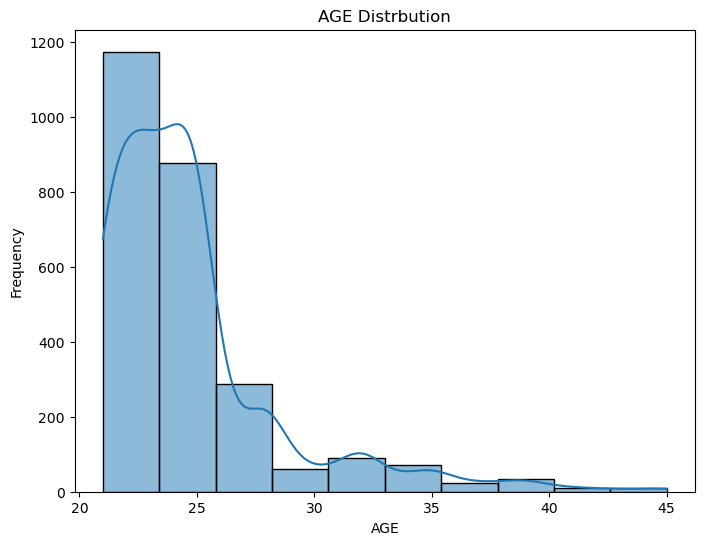

In [11]:
## AGE distribution 
plt.figure(figsize=(8,6))
sns.histplot(df["AGE"],kde=True,bins=10)
plt.title("AGE Distrbution")
plt.xlabel("AGE")
plt.ylabel("Frequency")
plt.show()

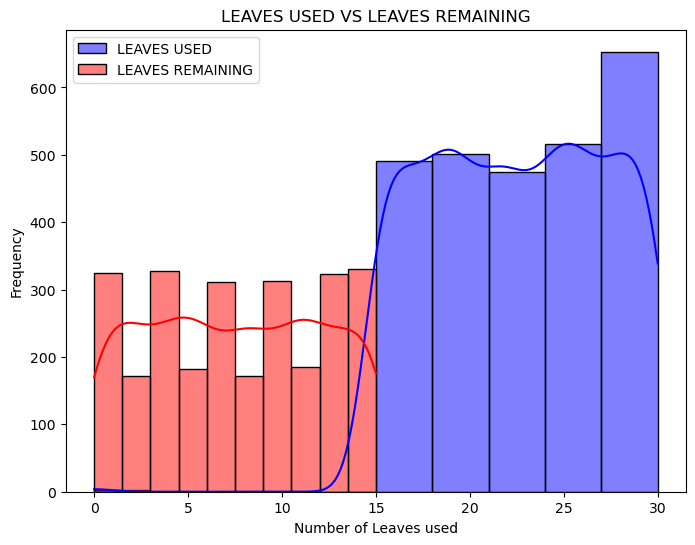

In [12]:
## LEAVES USED VS LEAVES REMAINING
plt.figure(figsize=(8,6))
sns.histplot(df["LEAVES USED"],kde=True,bins=10,color="blue",label="LEAVES USED")
sns.histplot(df["LEAVES REMAINING"],kde=True,bins=10,color="red",label="LEAVES REMAINING")
plt.title("LEAVES USED VS LEAVES REMAINING")
plt.xlabel("Number of Leaves used")
plt.ylabel("Frequency")
plt.legend()
plt.show()

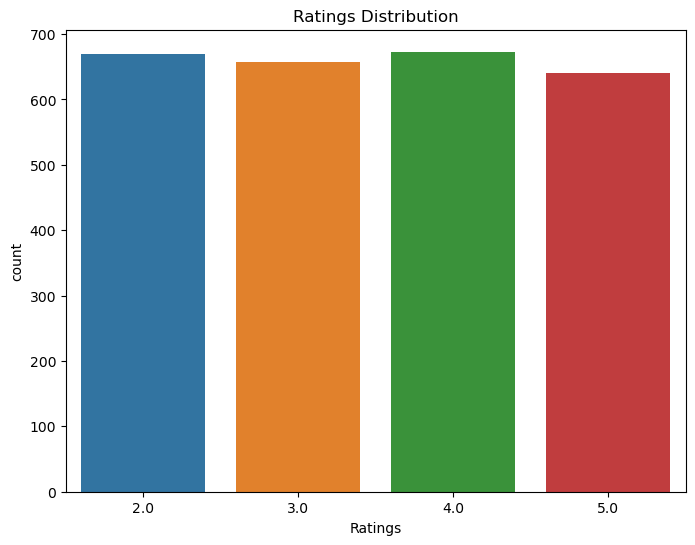

In [13]:
## Ratings Distribution
plt.figure(figsize=(8,6))
sns.countplot(x="RATINGS", data=df)
plt.title("Ratings Distribution")
plt.xlabel("Ratings")
plt.ylabel("count")
plt.show()

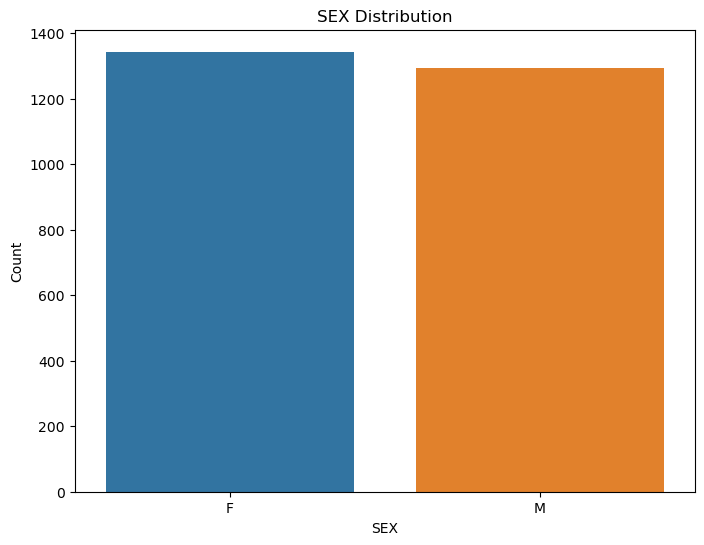

In [14]:
## sex distribution
plt.figure(figsize=(8,6))
sns.countplot(x="SEX",data=df)
plt.title("SEX Distribution")
plt.xlabel("SEX")
plt.ylabel("Count")
plt.show()

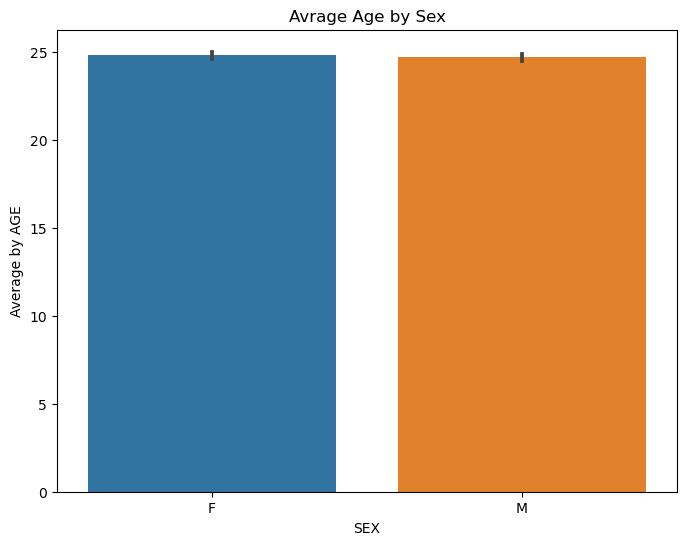

In [15]:
# barplot
plt.figure(figsize=(8,6))
sns.barplot(x="SEX",y="AGE",data=df)
plt.title("Avrage Age by Sex")
plt.xlabel("SEX")
plt.ylabel("Average by AGE")
plt.show()

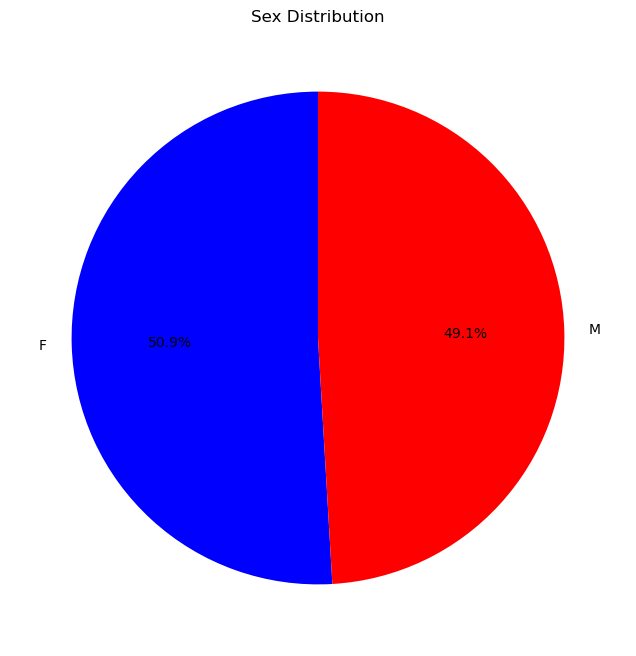

In [16]:
# Pie Chart (e.g., Distribution of Sex)
plt.figure(figsize=(8, 8))
df['SEX'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Sex Distribution')
plt.ylabel('')  # Hide y-label
plt.show()

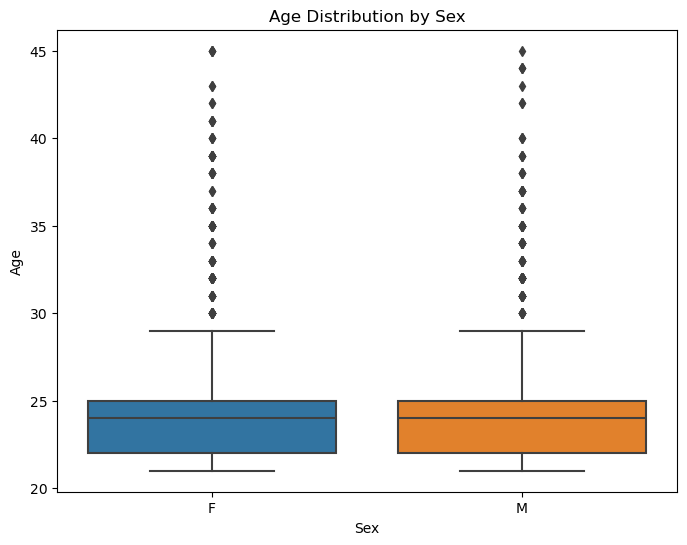

In [17]:
# Box Plot (e.g., Age Distribution by Sex)
plt.figure(figsize=(8, 6))
sns.boxplot(x='SEX', y='AGE', data=df)
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

## Feature Engineering

In [18]:
import pandas as pd
import numpy as np
from datetime import datetime
## convert date columns to datetime
df["DOJ"]=pd.to_datetime(df["DOJ"])
## calculate years of services
current_date=datetime.now()
df["Years of services"]=(current_date-df["DOJ"]).dt.days/365.25
## Calculate Age at joining
df["AGE at Joining"]=(df["DOJ"]-pd.to_datetime("now")).dt.days/365.25* -1+df["AGE"]
# Job Hopping Frequency (Assuming 0-3 for demonstration)
df['JOB_HOPPING_FREQUENCY'] = np.random.randint(0, 4, len(df))
# Hierarchy Level (Assuming 3 levels for demonstration)
df['HIERARCHY_LEVEL'] = np.random.choice(['Entry', 'Mid', 'Senior'], len(df))
# Job Hopping Frequency (Assuming 0-3 for demonstration)
df['JOB_HOPPING_FREQUENCY'] = np.random.randint(0, 4, len(df))
# Performance Trend (Assuming random change for demonstration)
df['PERFORMANCE_TREND'] = np.random.uniform(-1, 1, len(df))

# Top Performer Indicator (Assuming top 25% as top performers for demonstration)
df['TOP_PERFORMER'] = np.where(df['RATINGS'] >= df['RATINGS'].quantile(0.75), 1, 0)

# Leave Utilization Rate
df['LEAVE_UTILIZATION_RATE'] = df['LEAVES USED'] / (df['LEAVES USED'] + df['LEAVES REMAINING'])
# Age Group
bins = [20, 30, 40, 50, np.inf]
labels = ['20-30', '30-40', '40-50', '50+']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels)

# Display the engineered features
print(df[['FIRST NAME', 'DOJ',   
           'JOB_HOPPING_FREQUENCY', 'HIERARCHY_LEVEL', 'PERFORMANCE_TREND', 
          'TOP_PERFORMER', 'LEAVE_UTILIZATION_RATE', 'AGE_GROUP']])

     FIRST NAME        DOJ  JOB_HOPPING_FREQUENCY HIERARCHY_LEVEL  \
0        TOMASA 2014-05-18                      3             Mid   
1         ANNIE 2014-05-18                      3           Entry   
2         OLIVE 2014-07-28                      2           Entry   
3        CHERRY 2013-04-03                      0             Mid   
4          LEON 2014-11-20                      2             Mid   
...         ...        ...                    ...             ...   
2634  KATHERINE 2011-06-28                      2           Entry   
2635     LOUISE 2014-01-14                      0           Entry   
2636      RENEE 2014-01-23                      1           Entry   
2637       TERI 2014-03-17                      2          Senior   
2638    GREGORY 2014-09-18                      1          Senior   

      PERFORMANCE_TREND  TOP_PERFORMER  LEAVE_UTILIZATION_RATE AGE_GROUP  
0              0.057121              0                0.800000     20-30  
1              0.5204

## Data Preprocessing

In [19]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Define preprocessing steps
numeric_features = ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize features
])

categorical_features = ['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Impute missing values with 'Unknown'
    ('onehot', OneHotEncoder())  # One-hot encode categorical variables
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing pipeline to the DataFrame
processed_data = preprocessor.fit_transform(df)

# Convert processed_data to DataFrame for visualization and model training
processed_df = pd.DataFrame(processed_data)
print(processed_df.head())

                                                   0
0    (0, 0)\t-0.961893520717477\n  (0, 1)\t0.3268...
1    (0, 1)\t-4.820019962014959\n  (0, 2)\t1.1947...
2    (0, 0)\t-0.961893520717477\n  (0, 1)\t0.1123...
3    (0, 0)\t-0.705828955921348\n  (0, 1)\t-0.102...
4    (0, 1)\t0.9701962155055565\n  (0, 2)\t-0.978...


## Machine Learining Model Development

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame
# Let's say df is already defined and loaded with your data

# Separating features and target variable
X = df.drop(columns=['SALARY'])
y = df['SALARY']

# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create preprocessing and modeling pipeline
def create_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

# Define models
models = {
    'Linear Regression': create_pipeline(LinearRegression()),
    'Decision Tree': create_pipeline(DecisionTreeRegressor(random_state=42)),
    'Random Forest': create_pipeline(RandomForestRegressor(random_state=42)),
    'Gradient Boosting': create_pipeline(GradientBoostingRegressor(random_state=42))
}

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print("\n")


Model: Linear Regression
Mean Squared Error: 97367061.01683745
Mean Absolute Error: 4534.195857834999
R-squared: 0.9413641103489252


Model: Decision Tree
Mean Squared Error: 188944482.0094697
Mean Absolute Error: 5661.808712121212
R-squared: 0.8862148278731459


Model: Random Forest
Mean Squared Error: 111356241.35990189
Mean Absolute Error: 4555.923825757576
R-squared: 0.9329396182636288


Model: Gradient Boosting
Mean Squared Error: 120493405.01462825
Mean Absolute Error: 4686.372133401799
R-squared: 0.9274370826608576




In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming df is your DataFrame
# Let's say df is already defined and loaded with your data

# Separating features and target variable
X = df.drop(columns=['SALARY'])
y = df['SALARY']

# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create preprocessing and modeling pipeline
def create_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

# Define models
models = {
    'Linear Regression': create_pipeline(LinearRegression()),
    'Decision Tree': create_pipeline(DecisionTreeRegressor(random_state=42)),
    'Random Forest': create_pipeline(RandomForestRegressor(random_state=42)),
    'Gradient Boosting': create_pipeline(GradientBoostingRegressor(random_state=42))
}

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
evaluation_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    evaluation_results.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(evaluation_results)
print(results_df)

# Identify the model with the best performance based on R2 score
best_model = results_df.loc[results_df['R2'].idxmax()]
print("\nBest Model based on R-squared:")
print(best_model)


               Model           MSE          MAE          RMSE        R2
0  Linear Regression  9.736706e+07  4534.195858   9867.474906  0.941364
1      Decision Tree  1.889445e+08  5661.808712  13745.707767  0.886215
2      Random Forest  1.113562e+08  4555.923826  10552.546677  0.932940
3  Gradient Boosting  1.204934e+08  4686.372133  10976.948803  0.927437

Best Model based on R-squared:
Model    Linear Regression
MSE        97367061.016837
MAE            4534.195858
RMSE           9867.474906
R2                0.941364
Name: 0, dtype: object


In [22]:
import joblib

# Save the best model to disk
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

## Recommendation

 Based on your findings and insights from the model, provide actionable
 recommendations. These recommendations can be related to factors influencing salaries and potential
 strategies for improving earnings in data professions.